In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns



In [182]:
df=pd.read_csv('train.csv')

In [183]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


<Axes: >

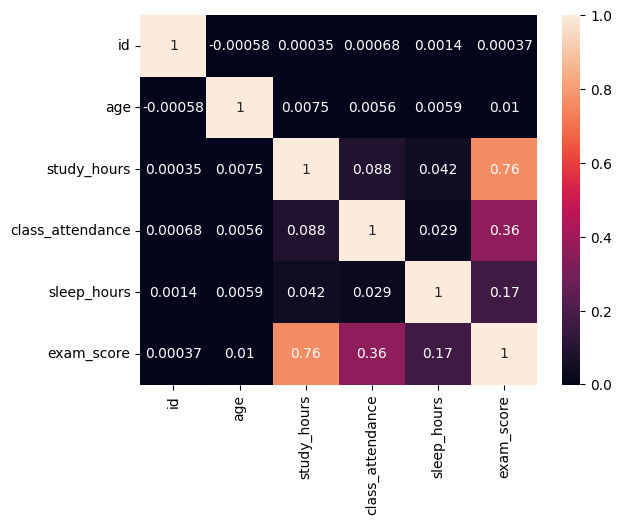

In [185]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True)

In [186]:
df.drop('id',axis=1,inplace=True)

In [187]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


# Checking dataset is balanced or imbalanced 

In [188]:
df['gender'].value_counts()

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

In [189]:
df['course'].value_counts()

course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64

In [190]:
df['internet_access'].value_counts()# little imbalance

internet_access
yes    579423
no      50577
Name: count, dtype: int64

In [191]:
df['sleep_quality'].value_counts()

sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64

In [192]:
df['study_method'].value_counts()

study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64

In [193]:
df['facility_rating'].value_counts()

facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64

In [194]:
df['exam_difficulty'].value_counts()

exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64

In [195]:
df.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [196]:
df['internet_access']=np.where(df['internet_access']=='yes',1,0)

In [197]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,0,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,1,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,1,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,1,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,1,9.6,good,self-study,high,easy,100.0


In [198]:
cat_col=df.select_dtypes(include=['object']).columns
df=pd.get_dummies(df,columns=cat_col,drop_first=True).astype(int)

In [199]:
df.head()

,age,study_hours,class_attendance,internet_access,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,21,7,98,0,4,78,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,18,4,94,1,4,46,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
2,20,4,92,1,5,99,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,19,2,49,1,8,63,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,23,7,86,1,9,100,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [200]:
df.shape

(630000, 24)

In [201]:
X=df.drop('exam_score',axis=1)
y=df['exam_score']

In [202]:
X

,age,study_hours,class_attendance,internet_access,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,21,7,98,0,4,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,18,4,94,1,4,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,20,4,92,1,5,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,19,2,49,1,8,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23,7,86,1,9,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4,70,1,4,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
629996,21,7,54,1,4,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
629997,24,0,44,1,4,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
629998,20,1,75,1,8,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [204]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train_scaled=st.fit_transform(X_train)
X_test_scaled=st.transform(X_test)

In [205]:
model=Sequential()

model.add(Dense(50,activation='relu',input_dim=23))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

c:\Users\choud\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501 (9.77 KB)

 Trainable params: 2,501 (9.77 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:
from tensorflow.keras.metrics import RootMeanSquaredError
model.compile(loss='mse',optimizer='adam',metrics=[RootMeanSquaredError])

In [208]:
model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=50)

Epoch 1/50
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 130.2737 - root_mean_squared_error: 11.4138 - val_loss: 86.1028 - val_root_mean_squared_error: 9.2792
Epoch 2/50
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 84.3013 - root_mean_squared_error: 9.1816 - val_loss: 84.4226 - val_root_mean_squared_error: 9.1882
Epoch 3/50
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 83.3767 - root_mean_squared_error: 9.1311 - val_loss: 83.4358 - val_root_mean_squared_error: 9.1343
Epoch 4/50
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 83.0587 - root_mean_squared_error: 9.1137 - val_loss: 82.7459 - val_root_mean_squared_error: 9.0965
Epoch 5/50
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 82.7917 - root_mean_squared_error: 9.0990 - val_loss: 83.3101 - val_root_mean_squared_error: 9.1274
Epoch 6/50
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 82.6610 - root_mean_squared_error: 9.0918 - val_loss: 82.7406 - val_root_mean_squared_error: 9.0962
Epoch 7/

In [209]:
y_pred_val=model.predict(X_test_scaled)

3938/3938 ━━━━━━━━━━━━━━━━━━━━ 2s 548us/step


In [210]:
y_pred_val.shape, y_test.shape

((126000, 1), (126000,))

In [211]:
y_test.values

array([57, 69, 79, ..., 54, 54, 46], shape=(126000,))

In [212]:
y_pred_val

array([[64.68782 ],
       [56.304726],
       [71.959785],
       ...,
       [59.93185 ],
       [58.65445 ],
       [43.442497]], shape=(126000, 1), dtype=float32)

In [213]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,y_pred_val)

9.081912994384766